### Week-2: k-NN Algorithm Revision

### Learning Outcomes

- Apply scientific thinking to data-oriented projects and tasks.
- Perform a range tasks to analyse and visualise data.

In [ ]:
# data source: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset?resource=download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../data/kaggle_student_performance_data.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


In [4]:
# drop the StudentID column
df=df.drop(columns=['StudentID'])
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


In [4]:
# List the columns with missing values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [123]:
df.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [124]:
# No missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 261.8 KB


### Basic visualizations

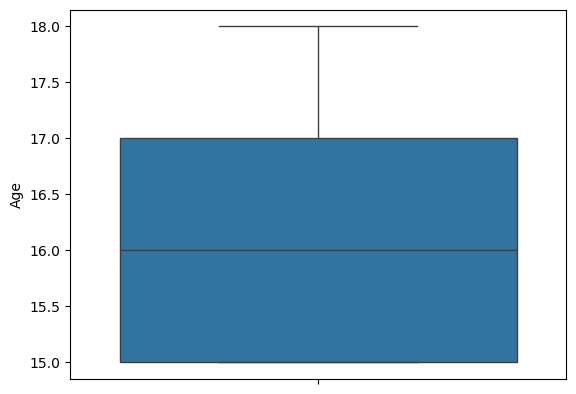

In [125]:
sns.boxplot(df['Age']);

### Question: Given the student age and GPA, predict the Grade Class?

##### Part 1: Identify the Independent and Dependent Variables

By convention, capital `X` holds the training data and small `y` holds the testing data.

In [11]:
X = df.iloc[:,:-1]
X.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


In [12]:
y = df.iloc[:,-1]
y.head()

0    2
1    1
2    4
3    3
4    4
Name: GradeClass, dtype: int64

##### Part 2: Split the data into training and testing set's

**Question:  For a machine learning task why we must split the dataset into 4 (four) part?**;


**Response:**. In scikit-learn, when we split the data into 4 parts, we are typically performing a train-test split for both features and target variables. The purpose of this split is to evaluate the performance of a machine learning model on unseen data. Here are the four parts that the data is typically split into:

1. **X_train** : The training data features. This is the portion of the dataset used to train the model.
2. **X_test** : The testing data features. This is the portion of the dataset used to evaluate the model performance.
3. **y_train** : The training data target variable. This corresponds to the labels or values associated with `X_train`.
4. **y_test** : The testing data target variable. This corresponds to the labels or values associated with `X_test`.


The rationale for this split can be summarized as follows:

1. **Training the Model** : The model is trained on `X_train` and `y_train`, learning the relationships between the features and the target variable.
2. **Evaluating the Model** : The model is evaluated on `X_test` and `y_test`. Since the model has not seen this data during training, this evaluation gives an unbiased estimate of the models performance on new, unseen data.


By splitting the data in this way, we ensure that we have a dedicated portion of the dataset to validate the model's performance, reducing the risk of overfitting and providing a more accurate measure of how the model will perform on new data.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=11)

**Question: How do I ensure the data split remains the same no matter how many times I excute the code?**

**Response:** You may answer something like the response given below,
We can use the parameter, **random_state** when splitting the dataset into train and test parts. The `random_state` parameter can be assigned any unique number you like. In above code notice the value for `random_state=11`. This will ensure your model results are reproducible.

In [14]:
X_train.shape

(1913, 13)

In [15]:
X_test.shape

(479, 13)

##### Part 3: Perform Standard Scaling on the independent variables so as to bring their values to same level

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.4777139 ,  0.97879252,  0.12361149, ..., -0.49623993,
        -0.43806428, -0.43652881],
       [ 0.4777139 ,  0.97879252,  0.12361149, ..., -0.49623993,
        -0.43806428, -0.25398461],
       [ 0.4777139 ,  0.97879252,  2.06985655, ..., -0.49623993,
        -0.43806428, -1.792072  ],
       ...,
       [-1.30718198,  0.97879252,  0.12361149, ..., -0.49623993,
        -0.43806428, -1.86840955],
       [-0.41473404,  0.97879252,  1.09673402, ..., -0.49623993,
         2.28277002, -0.3160355 ],
       [ 1.37016184,  0.97879252,  2.06985655, ..., -0.49623993,
        -0.43806428, -1.24492739]])

In [18]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.4777139 , -1.02166698,  2.06985655, ..., -0.49623993,
        -0.43806428,  0.78869061],
       [ 0.4777139 , -1.02166698,  2.06985655, ..., -0.49623993,
        -0.43806428,  0.17716359],
       [ 1.37016184, -1.02166698,  0.12361149, ..., -0.49623993,
        -0.43806428, -0.06803034],
       ...,
       [-1.30718198, -1.02166698, -0.84951104, ..., -0.49623993,
        -0.43806428, -1.04835609],
       [-1.30718198, -1.02166698,  1.09673402, ..., -0.49623993,
         2.28277002, -0.48073124],
       [-1.30718198, -1.02166698, -0.84951104, ..., -0.49623993,
        -0.43806428, -0.41730274]])

##### Final Part: Finding the value of k and applying the `kNN` algorithm

In [19]:
# Finding k using the sqrt method
np.sqrt(X_train.shape[0])

43.73785545725808

In [20]:
k=43

In [21]:
# create classifier model
knn = KNeighborsClassifier(n_neighbors=k)

In [22]:
# Model training
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=43)

In [23]:
y_pred = knn.predict(X_test)

In [24]:
y_pred.shape

(479,)

In [25]:
y_test.shape

(479,)

In [26]:
# Now we compare y_pred with y_test to see how accurate our model was
accuracy_score(y_test, y_pred)

0.6680584551148225

In [27]:
confusion_matrix(y_test, y_pred)

array([[  0,   7,  11,   0,   3],
       [  0,  14,  27,   2,  10],
       [  0,   3,  37,  20,   7],
       [  0,   0,  13,  16,  53],
       [  0,   2,   0,   1, 253]], dtype=int64)

In [ ]:
# 2nd Method: Let's go ahead and use the elbow method to pick a good K Value

In [32]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [33]:
error_rate

[0.4279749478079332,
 0.4989561586638831,
 0.4112734864300626,
 0.38204592901878914,
 0.38413361169102295,
 0.3924843423799583,
 0.348643006263048,
 0.3736951983298539,
 0.3674321503131524,
 0.35908141962421714,
 0.35908141962421714,
 0.348643006263048,
 0.35908141962421714,
 0.3444676409185804,
 0.325678496868476,
 0.33194154488517746,
 0.3173277661795407,
 0.31941544885177453,
 0.3235908141962422,
 0.325678496868476,
 0.33194154488517746,
 0.34029227557411273,
 0.33611691022964507,
 0.34029227557411273,
 0.33611691022964507,
 0.3444676409185804,
 0.33611691022964507,
 0.33402922755741127,
 0.34029227557411273,
 0.33402922755741127,
 0.32150313152400833,
 0.3277661795407098,
 0.3277661795407098,
 0.3298538622129436,
 0.3235908141962422,
 0.3298538622129436,
 0.3277661795407098,
 0.33402922755741127,
 0.3235908141962422]

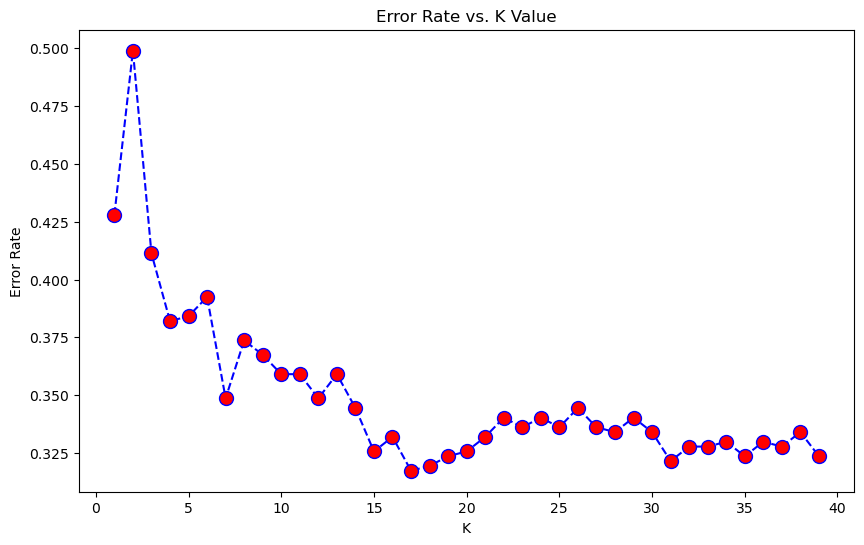

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

Here we can see when k=18 the error rate is the lowest. Let's retrain the model with that and check the classification report!

In [30]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=43
knn = KNeighborsClassifier(n_neighbors=43)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=43')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=43


[[  0   7  11   0   3]
 [  0  14  27   2  10]
 [  0   3  37  20   7]
 [  0   0  13  16  53]
 [  0   2   0   1 253]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.54      0.26      0.35        53
           2       0.42      0.55      0.48        67
           3       0.41      0.20      0.26        82
           4       0.78      0.99      0.87       256

    accuracy                           0.67       479
   macro avg       0.43      0.40      0.39       479
weighted avg       0.60      0.67      0.62       479



In [31]:
# NOW WITH K=18
knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=18')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=18


[[  1  10   6   0   4]
 [  0  17  21   3  12]
 [  0   2  35  25   5]
 [  0   0  15  26  41]
 [  0   2   1   6 247]]


              precision    recall  f1-score   support

           0       1.00      0.05      0.09        21
           1       0.55      0.32      0.40        53
           2       0.45      0.52      0.48        67
           3       0.43      0.32      0.37        82
           4       0.80      0.96      0.87       256

    accuracy                           0.68       479
   macro avg       0.65      0.43      0.44       479
weighted avg       0.67      0.68      0.65       479

